<a href="https://colab.research.google.com/github/kauefs/AirBnB/blob/%40/notebook/CriminalidadeSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center><a href=https://sigmoidal.ai/><img alt=SigMoidal src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png width=15%>
<br>
<img src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png width=20%><a/></p>

# <center>Data Science na Prática</center>

---
# <center>Criminalidade em São Paulo</center>

$$10\ October\ 2023$$

<p align=center><img src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/saopaulo_skyline.png></p>

**Criminalidade** é problema recorrente nas grandes cidades brasileiras, apesar da busca constante por soluções para a questão. Técnicas de Ciência de Dados podem ajudar a melhor compreender a situação, podendo gerar _InSights_ para direcionar ações de combate ao crime.

<p align=center><img src=https://raw.githubusercontent.com/kauefs/StreamLit/master/img/CriminalidadeSP.png></p>

## Dados

Fonte**:** [GeoSpatial Sao Paulo Crime DataBase](https://www.kaggle.com/datasets/danlessa/geospatial-sao-paulo-crime-database/data)

Período**:** 2010 a 2018.

Dados como esses podem ser obtidos diretamente das secretarias de cada estado; entretanto, a vantagem do conjunto a ser utilizados é que ele já passou por processo de limpeza, facilitando a exploração.

> Como se trata de um exercício de estudo, utilizar**-**se**-**á dados não**-**oficiais, isto é, dados que não são do governo ou da prefeitura de São Paulo e sim dados obtidos a partir de informações dos usuários da plataforma colaborativa [Onde Fui Roubado](https://www.ondefuiroubado.com.br/).

O primeiro passo para análise é carregar as bibliotecas necessárias e os dados a serem analisados**:**

`Pandas`**:** biblioteca que permite trabalhar com arquivos csv com facilidade, em formato tabular, semelhante a tabelas do Excel.

`MatPlotLib` **&** `SeaBorn`**:** bibliotecas gráficas para plotar visualização de dados.

`Numpy`**:** uma das bibliotecas mais utilizadas em Data Science, com suporte para trabalhar com arrays multidimensionais, matrizes, etc.

In [ ]:
# Libraries:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
# Plotting Style:
plt.rcParams['figure.figsize'    ] = [15.00, 7.50]
plt.rcParams['figure.autolayout'] = True
sns.set_style()
# DataFrame Display Configuration:
pd.set_option('display.max.columns', None)
# DataSet:
df       = pd.read_csv('https://www.dropbox.com/s/ghgb8xggbhgyuk3/dataset-limpo.csv?dl=1', parse_dates=['time'])
# Transforming 'time' into DateTime and Setting it as Index:
df.index = pd.to_datetime(df.time, infer_datetime_format=True)
# Sorting Index Chronologically:
df.sort_index(inplace=True)
# Saving DataFrame:
df.to_csv('CriminalidadeSP0.csv')
# Visualyzing First & Last Entries:
df#.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,sexo,tipo_assalto_id,titulo,uri,user_id,valor_prejuizo,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-14 09:26:00,47195,República,2015-03-16 12:28:29.672,assaltado quando ia pra sta efigênia.,"Avenida Ipiranga, 877, República",47195,NaN,-23.541994,-46.640245,NaN,1,1,assaltado quando ia pra sta efigênia.,/denuncias/eQYb6e-assaltado-quando-ia-pra-sta-...,NaN,200.0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-03-14 09:26:00
2010-03-19 19:00:00,84093,Vila Gomes Cardim,2017-08-19 01:45:21.178,Dois homens abordaram enquanto estava ajusta d...,"Rua Padre Estevão Pernet, 783 - Vila Gomes Car...",84093,179.34.222.209,-23.541894,-46.567245,True,1,9,Assalto mao armada veiculo,/denuncias/z0bG7V-assalto-mao-armada-veiculo,NaN,2500.0,NaN,True,True,True,True,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,2010-03-19 19:00:00
2010-03-21 17:30:00,45700,Vila Sônia,2015-02-04 07:56:31.394,"Ainda era claro e o ponto tinha mais gente, sa...","Avenida Giovanni Gronchi, 3410–3436, Vila Sônia",45700,NaN,-23.611407,-46.728001,True,0,2,No ponto de ônibus.. 3 caras\n,/denuncias/VKGL9V-no-ponto-de-onibus-3-caras,NaN,800.0,NaN,True,True,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2010-03-21 17:30:00
2010-04-14 19:00:00,50178,NaN,2015-06-23 11:48:40.855,Entraram dois homens armados e me colocaram no...,"Rua Galeno de Almeida, 76-148 - Pinheiros, São...",50178,177.213.8.200,-23.552480,-46.677330,True,1,4,Sequestro relampago,/denuncias/axbjOe-sequestro-relampago,NaN,4000.0,NaN,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,2010-04-14 19:00:00
2010-06-05 13:45:00,48035,Consolação,2015-04-04 05:55:19.970,Andando na calçada e falando no celular um gar...,"Avenida Angélica, 1150, Consolação",48035,NaN,-23.542730,-46.656423,False,1,1,Trombadinhas de Bicicleta\n,/denuncias/z68DrV-trombadinhas-de-bicicleta,NaN,400.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-05 13:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-18 15:45:00,88527,Barra Funda,2018-03-18 21:34:52.731,"Estava aguardando ônibus ""978L Terminal Cachoe...","R. Brg. Galvão, 622 - Barra Funda, São Paulo -...",88527,189.121.160.95,-23.530363,-46.657436,True,0,2,Fui roubada ponto de ônibus dentro da Barra Funda,/denuncias/znEEg0-fui-roubada-ponto-de-onibus-...,NaN,1300.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-18 15:45:00
2018-03-18 23:15:00,88538,Liberdade,2018-03-19 08:51:35.418,Eu e uma amiga estavamos esperando onibus e um...,"R. da Glória, 410 - Liberdade, São Paulo - SP,...",88538,201.6.131.218,-23.556905,-46.634436,False,0,11,Nóia tentou roubar bolsa armada com tesoura,/denuncias/V966Px-noia-tentou-roubar-bolsa-arm...,NaN,0.0,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-18 23:15:00
2018-03-19 07:00:00,88545,Centro,2018-03-19 14:57:37.517,"No caminho do Metrô Borba Gato para UNIP, grup...","R. Bela Vista, 762-798 - Centro, São Paulo - S...",88545,189.40.90.54,-23.631256,-46.695475,False,0,3,Assalto aos alunos da UNIP,/denuncias/VR11XZ-assalto-aos-alunos-da-unip,NaN,2000.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-19 07:00:00


In [ ]:
# DataSet Summary:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-03-14 09:26:00 to 2018-03-20 22:05:00
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  12899 non-null  int64         
 1   bairro              11196 non-null  object        
 2   created_at          12899 non-null  object        
 3   descricao           12898 non-null  object        
 4   endereco            12899 non-null  object        
 5   id.1                12899 non-null  int64         
 6   ip_address_origin   11705 non-null  object        
 7   latitude            12899 non-null  float64       
 8   longitude           12899 non-null  float64       
 9   registrou_bo        12375 non-null  object        
 10  sexo                12899 non-null  int64         
 11  tipo_assalto_id     12899 non-null  int64         
 12  titulo              12899 non-null  object        
 13  uri        

A partir do sumário **(**`info`**)** do _DataSet_, é possivel verificar suas dimensões, isto é, a quantidade **(**36**)**, o tipo de dados **(**`datetime`, `float`, `int`, `object`**/**string**)**, e a relação de colunas**/**variáveis e a quantidade de entradas total **(**12**.**899**)** e o quantitativo não**-**nulo de cada variável, bem como seus nomes, além do período abordado pelos dados **(**2010 a 2018**)**, uma vez que foram organizados cronologicamente durante o carregamento.

A partir da relação de colunas, é possível criar um dicionário de variáveis para melhor entender do que se trata cada informação**:**

## Dicionário de Variáveis

Descrição das variáveis (_features_) presente no _DataSet_, de acordo com a fonte dos dados**:**

* `id`**:**                 número de identificação da ocorrência;
* `bairro`**:**             bairro onde ocorreu o crime;
* `created_at`**:**         data de criação da ocorrência;
* `descricao`**:**          descrição da ocorrência;
* `endereco`**:**           endereço  da ocorrência;
* `id.1`**:**               desconhecido;
* `ip_address_origin`**:**  endereço  de IP de quem criou o registro;
* `latitude`**:**           latitude  da ocorrência;
* `longitude`**:**          longitude da ocorrência;
* `registrou_bo`**:**       indica se a vítima registrou boletim de ocorrência;
* `sexo`**:**               gênero da vítima;
* `tipo_assalto_id`**:**    tipo   de assalto;
* `titulo`**:**             título da ocorrência;
* `uri`**:**                URI    do incidente;
* `user_id`**:**            ID     do usuário;
* `valor_prejuizo`**:**     Valor do prejuízo em reais;

Demais variáveis são valores booleanos que indicam se o item foi levado ou não**:**

* `Bicicleta`
* `Bolsa ou Mochila`
* `Carteira`
* `Cartão de Crédito`
* `Celular`
* `Computador`
* `DVD`
* `Dinheiro`
* `Documentos`
* `Equipamento de Som`
* `Estepe`
* `MP4 ou Ipod`
* `Móveis`
* `Notebook`
* `Outros`
* `Relógio`
* `Som`
* `Tablet`
* `Tv`


* `time`**:** data **&** horário do incidente.

Análise estatística é parte fundamental da análise de dados, pois possibilita _InSights_ valiosos sobre os dados.

A função `describe()` permite ver a distribuição estatística das variáveis**:**

* `count`**:**  contagem de entradas válidas para cada variável;
* `mean`**:**   média aritmética dos valores da variável;
* `std`**:**    desvio**-**padrão;
* `min`**:**    menor valor existente para a variável;
* `25%`**:**    primeiro quartil;
* `50%`**:**    mediana **(**segundo quartil**)**;
* `75%`**:**    terceiro quartil;
* `max`**:**    maior valor existente para a variável.

In [ ]:
df.describe()

,id,id.1,latitude,longitude,sexo,tipo_assalto_id,user_id,valor_prejuizo
count,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,1166.000000,12899.000000
mean,45901.500194,45901.500194,-23.566805,-46.636817,0.612528,3.230483,16920.901372,2745.264592
std,24974.232979,24974.232979,0.366295,0.439810,0.487192,2.831739,5056.911119,11115.126241
min,21.000000,21.000000,-26.473037,-52.173376,0.000000,1.000000,1900.000000,0.000000
25%,25176.500000,25176.500000,-23.607056,-46.696776,0.000000,2.000000,13039.500000,25.000000
50%,44565.000000,44565.000000,-23.567079,-46.648535,1.000000,2.000000,16914.500000,700.000000
75%,68446.500000,68446.500000,-23.541510,-46.606492,1.000000,3.000000,21038.250000,2000.000000
max,88573.000000,88573.000000,-0.013911,0.004533,1.000000,11.000000,25802.000000,1000000.000000


Há muitas variáveis numéricas representando categorias com números cujas informações precisam ser acessadas de outra forma; entretanto, pode**-**se observar a variável `valor_prejuizo` e tirar alguns _InSights_**:**

* Média de prejuízo causado pelos crimes**:** 2**.**745**,**26 reais;
* Maior prejuízo registrado**:** 1**.**000**.**000**,**00 **(**um milhão**)** de reais;
* Desvio**-**padrão**:** 11**.**115**,**13 reais, indicando alta variação, uma vez que o primeiro quartil é 25 reais, indicando a presença de _OutLiers_, que eleva a média e o desvio**-**padrão;
* Valor mínimo de zero pode causar estranhamento a princípio, mas nem todos os crimes registrados causam prejuízos.

É possível, também, verificar a distribuição estatística de variáveis categóricas, com o argumento `include='O'` **(**letra **'**O**')**, para que busque as variáveis categóricas**:**

* `count`**:**  contagem de entradas válidas para a variável;
* `unique`**:** quantidade de entradas únicas;
* `top`**:**    entrada mais comum;
* `freq`**:**   frequência em que a entrada mais comum ocorre.

In [ ]:
df.describe(include='O')

,bairro,created_at,descricao,endereco,ip_address_origin,registrou_bo,titulo,uri,Bicicleta,Bolsa ou Mochila,Carteira,Cartão de Crédito,Celular,Computador,DVD,Dinheiro,Documentos,Equipamento de Som,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv
count,11196,12899,12898,12899,11705,12375,12899,12899,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178
unique,1577,12899,12898,11986,10432,2,10169,12899,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,São Paulo,2015-03-16 12:28:29.672,assaltado quando ia pra sta efigênia.,Carregando endereço,127.0.0.1,True,Fui assaltado voltando do trabalho,/denuncias/eQYb6e-assaltado-quando-ia-pra-sta-...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,630,1,1,15,94,7340,154,1,256,3631,4243,2776,8377,112,94,1730,3660,239,324,552,45,764,5243,1350,106,443,178


Algumas informações podem ser observadas**:**

* Foram regristrados crimes em 1577 diferentes bairros;
* A maioria das pessoas registrou boletim de ocorrência;
* O título mais comum para registro de crime foi **'**_Fui assaltado voltando do trabalho_**'**, o que diz muito sobre a situação da segurança pública na cidade;
* O objeto mais roubado é **celular**.

## Tratamento de Dados

Ao limpar**/**tratar os dados de um _DataSet_, é preciso cuidado e boa compreensão do conjunto de dados. No caso, já se verificou algumas variáveis com valores ausentes.

Ausência de valores também pode representar significado. Nas variáveis que representam os objetos, caso o valor seja `True`, significa que o objeto foi levado, e caso seja `NaN` **(**nulo ou ausente**)**, significa que o objeto não foi levado ou mesmo esquecido de ser lançado. É preciso, portanto, levar isso em consideração na hora de tratar os dados.

No caso de valores ausentes cuja ausência não possui significado, sendo simplesmente dados faltantes, alguns outros aspectos podem ser considerados**:**

* Quantidade de entradas**/**linhas com valores ausentes;
* Importância**/**peso da variável para a análise;
* Facilidade em inferir valor para as entradas ausentes;
* Impacto de cada método de preenchimento na análise e nos possíveis modelos de _Machine Learning_ a serem eventualmente aplicados.

Uma boa prática é criar uma cópia do _DataSet_ original, preservando**-**o e podendo sempre restaurá**-**lo, caso algo dê errado, além de poder usá**-**los como referência, caso necessário.

Observa**-**se que algumas variáveis não possuem utilidade para esta análise, pensando na construção de um _DashBoard_, podendo ser excluídas **(**`id.1`, `ip_address_origin`, `uri`, `user_id` **)**.

Além disso, para melhor organização, renomear**-**se**-**á algumas colunas.

 O parâmetro `inplace=True` garante que a mudança seja realizada no próprio _DataSet_.

In [ ]:
# Copying DataFrame:
df1 = df.copy()
# Removing some Columns:
df1.drop(['id.1', 'ip_address_origin', 'uri', 'user_id'], axis=1, inplace=True)
# Renaming some Columns:
rename = {'created_at'        :'created'       ,
          'registrou_bo'      :'BO'            ,
          'tipo_assalto_id'   :'AssaltoID'     ,
          'valor_prejuizo'    :'prejuizo'      ,
          'Bolsa ou Mochila'  :'BolsaMochila'  ,
          'Cartão de Crédito' :'CartaoCredito' ,
          'Equipamento de Som':'EquipamentoSom',
          'MP4 ou Ipod'       :'iPodMP4'       ,
          'Móveis'            :'Moveis'        ,
          'Notebook'          :'NoteBook'      ,
          'Relógio'           :'Relogio'       ,
          'Tv'                :'TV'            }
df1.rename(columns=rename, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-03-14 09:26:00 to 2018-03-20 22:05:00
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              12899 non-null  int64         
 1   bairro          11196 non-null  object        
 2   created         12899 non-null  object        
 3   descricao       12898 non-null  object        
 4   endereco        12899 non-null  object        
 5   latitude        12899 non-null  float64       
 6   longitude       12899 non-null  float64       
 7   BO              12375 non-null  object        
 8   sexo            12899 non-null  int64         
 9   AssaltoID       12899 non-null  int64         
 10  titulo          12899 non-null  object        
 11  prejuizo        12899 non-null  float64       
 12  Bicicleta       256 non-null    object        
 13  BolsaMochila    3631 non-null   object        
 14  Carteira        424

In [ ]:
# Verifying Missing Values:
df1.isnull().sum().sort_values(ascending=False)

Moveis            12854
DVD               12805
Som               12793
Computador        12787
TV                12721
EquipamentoSom    12660
Bicicleta         12643
Estepe            12575
Tablet            12456
iPodMP4           12347
NoteBook          12135
Relogio           11549
Dinheiro          11169
CartaoCredito     10123
BolsaMochila       9268
Documentos         9239
Carteira           8656
Outros             7656
Celular            4522
bairro             1703
BO                  524
descricao             1
id                    0
prejuizo              0
titulo                0
AssaltoID             0
sexo                  0
longitude             0
latitude              0
endereco              0
created               0
time                  0
dtype: int64

In [ ]:
# Missing Values Percentage:
df1.isnull().mean().sort_values(ascending=False)

Moveis            0.996511
DVD               0.992713
Som               0.991782
Computador        0.991317
TV                0.986200
EquipamentoSom    0.981471
Bicicleta         0.980154
Estepe            0.974882
Tablet            0.965656
iPodMP4           0.957206
NoteBook          0.940771
Relogio           0.895341
Dinheiro          0.865881
CartaoCredito     0.784790
BolsaMochila      0.718505
Documentos        0.716257
Carteira          0.671060
Outros            0.593534
Celular           0.350570
bairro            0.132026
BO                0.040623
descricao         0.000078
id                0.000000
prejuizo          0.000000
titulo            0.000000
AssaltoID         0.000000
sexo              0.000000
longitude         0.000000
latitude          0.000000
endereco          0.000000
created           0.000000
time              0.000000
dtype: float64

### Dados Ausentes

Verifica**-**se valores N**a**N **(**Nulos ou Ausentes**)**, sobretudo nas variáveis categóricas, apesar dos valores `True` terem sido definidos como **1**.

Para correção, usar**-**se**-**á a função `fillna()` para substituir os valores ausentes por zero **(**0**)**.

In [ ]:
# Boolean Columns:
bool_columns = ['BO', 'Bicicleta', 'BolsaMochila', 'Carteira', 'CartaoCredito',
                'Celular', 'Computador', 'DVD', 'Dinheiro' , 'Documentos',
                'EquipamentoSom', 'Estepe', 'iPodMP4', 'Moveis',
                'NoteBook', 'Outros', 'Relogio', 'Som', 'Tablet', 'TV']
# Replacing NaN by False:
df1[bool_columns] = df1[bool_columns].fillna(False)
# Verifying:
df1#.head()

,id,bairro,created,descricao,endereco,latitude,longitude,BO,sexo,AssaltoID,titulo,prejuizo,Bicicleta,BolsaMochila,Carteira,CartaoCredito,Celular,Computador,DVD,Dinheiro,Documentos,EquipamentoSom,Estepe,iPodMP4,Moveis,NoteBook,Outros,Relogio,Som,Tablet,TV,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-14 09:26:00,47195,República,2015-03-16 12:28:29.672,assaltado quando ia pra sta efigênia.,"Avenida Ipiranga, 877, República",-23.541994,-46.640245,False,1,1,assaltado quando ia pra sta efigênia.,200.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010-03-14 09:26:00
2010-03-19 19:00:00,84093,Vila Gomes Cardim,2017-08-19 01:45:21.178,Dois homens abordaram enquanto estava ajusta d...,"Rua Padre Estevão Pernet, 783 - Vila Gomes Car...",-23.541894,-46.567245,True,1,9,Assalto mao armada veiculo,2500.0,False,True,True,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,2010-03-19 19:00:00
2010-03-21 17:30:00,45700,Vila Sônia,2015-02-04 07:56:31.394,"Ainda era claro e o ponto tinha mais gente, sa...","Avenida Giovanni Gronchi, 3410–3436, Vila Sônia",-23.611407,-46.728001,True,0,2,No ponto de ônibus.. 3 caras\n,800.0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,2010-03-21 17:30:00
2010-04-14 19:00:00,50178,NaN,2015-06-23 11:48:40.855,Entraram dois homens armados e me colocaram no...,"Rua Galeno de Almeida, 76-148 - Pinheiros, São...",-23.552480,-46.677330,True,1,4,Sequestro relampago,4000.0,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,2010-04-14 19:00:00
2010-06-05 13:45:00,48035,Consolação,2015-04-04 05:55:19.970,Andando na calçada e falando no celular um gar...,"Avenida Angélica, 1150, Consolação",-23.542730,-46.656423,False,1,1,Trombadinhas de Bicicleta\n,400.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010-06-05 13:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-18 15:45:00,88527,Barra Funda,2018-03-18 21:34:52.731,"Estava aguardando ônibus ""978L Terminal Cachoe...","R. Brg. Galvão, 622 - Barra Funda, São Paulo -...",-23.530363,-46.657436,True,0,2,Fui roubada ponto de ônibus dentro da Barra Funda,1300.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-18 15:45:00
2018-03-18 23:15:00,88538,Liberdade,2018-03-19 08:51:35.418,Eu e uma amiga estavamos esperando onibus e um...,"R. da Glória, 410 - Liberdade, São Paulo - SP,...",-23.556905,-46.634436,False,0,11,Nóia tentou roubar bolsa armada com tesoura,0.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-18 23:15:00
2018-03-19 07:00:00,88545,Centro,2018-03-19 14:57:37.517,"No caminho do Metrô Borba Gato para UNIP, grup...","R. Bela Vista, 762-798 - Centro, São Paulo - S...",-23.631256,-46.695475,False,0,3,Assalto aos alunos da UNIP,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-19 07:00:00


In [ ]:
# Verifying Missing Values Again:
df1.isnull().sum().sort_values(ascending=False)

bairro            1703
descricao            1
Moveis               0
DVD                  0
Dinheiro             0
Documentos           0
EquipamentoSom       0
Estepe               0
iPodMP4              0
id                   0
Computador           0
Outros               0
Relogio              0
Som                  0
Tablet               0
TV                   0
NoteBook             0
Celular              0
CartaoCredito        0
Carteira             0
BolsaMochila         0
Bicicleta            0
prejuizo             0
titulo               0
AssaltoID            0
sexo                 0
BO                   0
longitude            0
latitude             0
endereco             0
created              0
time                 0
dtype: int64

Para o preenchimento de dados, há algumas opções**:**

* Inserir a média;
* Inserir a moda **(**valor mais frequênte**)**;
* Criar um modelo que faça a previsão de valores.

Tudo depende do caso em estudo e qual solução tem o melhor _Trade**-**Off_ entre trabalho necessário, resultado possível e efeito sobre a análise**/**modelo.

Neste caso, para as variáveis com valores ausentes, não vale a pena criar modelo para inferir pois estão em um número que pode ser considerado pequeno, não tendo grande impacto na análise.

A fim de preservar a maior quantidade de dados possível, valores ausentes restantes serão substituídos por **'**N**/**A**'**.

In [ ]:
# Locating Single NaN entry in 'descricao':
df1.loc[df['descricao'].isnull()]

,id,bairro,created,descricao,endereco,latitude,longitude,BO,sexo,AssaltoID,titulo,prejuizo,Bicicleta,BolsaMochila,Carteira,CartaoCredito,Celular,Computador,DVD,Dinheiro,Documentos,EquipamentoSom,Estepe,iPodMP4,Moveis,NoteBook,Outros,Relogio,Som,Tablet,TV,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-16 21:00:00,47394,Vila Nova Parada,2015-03-18 16:21:45.943,NaN,"Rua Cordeiro da Silva, 108-212 - Vila Nova Par...",-23.43702,-46.715887,False,1,2,Estava indo embora,1000.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2015-03-16 21:00:00


In [ ]:
# Replacing NaN by False:
df1['bairro']    = df1['bairro'].fillna('N/A')
df1['descricao'] = df1['descricao'].fillna('N/A')
# Verifying:
df1.loc[df['descricao']=='N/A']

,id,bairro,created,descricao,endereco,latitude,longitude,BO,sexo,AssaltoID,titulo,prejuizo,Bicicleta,BolsaMochila,Carteira,CartaoCredito,Celular,Computador,DVD,Dinheiro,Documentos,EquipamentoSom,Estepe,iPodMP4,Moveis,NoteBook,Outros,Relogio,Som,Tablet,TV,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Verifying Missing Values One More Time:
df1.isnull().sum().sort_values(ascending=False)

id                0
bairro            0
TV                0
Tablet            0
Som               0
Relogio           0
Outros            0
NoteBook          0
Moveis            0
iPodMP4           0
Estepe            0
EquipamentoSom    0
Documentos        0
Dinheiro          0
DVD               0
Computador        0
Celular           0
CartaoCredito     0
Carteira          0
BolsaMochila      0
Bicicleta         0
prejuizo          0
titulo            0
AssaltoID         0
sexo              0
BO                0
longitude         0
latitude          0
endereco          0
descricao         0
created           0
time              0
dtype: int64

In [ ]:
# Verifying .info():
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12899 entries, 2010-03-14 09:26:00 to 2018-03-20 22:05:00
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              12899 non-null  int64         
 1   bairro          12899 non-null  object        
 2   created         12899 non-null  object        
 3   descricao       12899 non-null  object        
 4   endereco        12899 non-null  object        
 5   latitude        12899 non-null  float64       
 6   longitude       12899 non-null  float64       
 7   BO              12899 non-null  bool          
 8   sexo            12899 non-null  int64         
 9   AssaltoID       12899 non-null  int64         
 10  titulo          12899 non-null  object        
 11  prejuizo        12899 non-null  float64       
 12  Bicicleta       12899 non-null  bool          
 13  BolsaMochila    12899 non-null  bool          
 14  Carteira        128

The memory usage **(**_size_**)** of the _DataSet_ reduziu para mais da metade após o processo de limpeza, deixando o menor, facilitando o processamento futuro.

In [ ]:
# Checking New DataFrame:
df1#.head()

,id,bairro,created,descricao,endereco,latitude,longitude,BO,sexo,AssaltoID,titulo,prejuizo,Bicicleta,BolsaMochila,Carteira,CartaoCredito,Celular,Computador,DVD,Dinheiro,Documentos,EquipamentoSom,Estepe,iPodMP4,Moveis,NoteBook,Outros,Relogio,Som,Tablet,TV,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-14 09:26:00,47195,República,2015-03-16 12:28:29.672,assaltado quando ia pra sta efigênia.,"Avenida Ipiranga, 877, República",-23.541994,-46.640245,False,1,1,assaltado quando ia pra sta efigênia.,200.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010-03-14 09:26:00
2010-03-19 19:00:00,84093,Vila Gomes Cardim,2017-08-19 01:45:21.178,Dois homens abordaram enquanto estava ajusta d...,"Rua Padre Estevão Pernet, 783 - Vila Gomes Car...",-23.541894,-46.567245,True,1,9,Assalto mao armada veiculo,2500.0,False,True,True,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,2010-03-19 19:00:00
2010-03-21 17:30:00,45700,Vila Sônia,2015-02-04 07:56:31.394,"Ainda era claro e o ponto tinha mais gente, sa...","Avenida Giovanni Gronchi, 3410–3436, Vila Sônia",-23.611407,-46.728001,True,0,2,No ponto de ônibus.. 3 caras\n,800.0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,2010-03-21 17:30:00
2010-04-14 19:00:00,50178,N/A,2015-06-23 11:48:40.855,Entraram dois homens armados e me colocaram no...,"Rua Galeno de Almeida, 76-148 - Pinheiros, São...",-23.552480,-46.677330,True,1,4,Sequestro relampago,4000.0,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,2010-04-14 19:00:00
2010-06-05 13:45:00,48035,Consolação,2015-04-04 05:55:19.970,Andando na calçada e falando no celular um gar...,"Avenida Angélica, 1150, Consolação",-23.542730,-46.656423,False,1,1,Trombadinhas de Bicicleta\n,400.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2010-06-05 13:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-18 15:45:00,88527,Barra Funda,2018-03-18 21:34:52.731,"Estava aguardando ônibus ""978L Terminal Cachoe...","R. Brg. Galvão, 622 - Barra Funda, São Paulo -...",-23.530363,-46.657436,True,0,2,Fui roubada ponto de ônibus dentro da Barra Funda,1300.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-18 15:45:00
2018-03-18 23:15:00,88538,Liberdade,2018-03-19 08:51:35.418,Eu e uma amiga estavamos esperando onibus e um...,"R. da Glória, 410 - Liberdade, São Paulo - SP,...",-23.556905,-46.634436,False,0,11,Nóia tentou roubar bolsa armada com tesoura,0.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-18 23:15:00
2018-03-19 07:00:00,88545,Centro,2018-03-19 14:57:37.517,"No caminho do Metrô Borba Gato para UNIP, grup...","R. Bela Vista, 762-798 - Centro, São Paulo - S...",-23.631256,-46.695475,False,0,3,Assalto aos alunos da UNIP,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2018-03-19 07:00:00


In [ ]:
# Saving Cleaned DataFrame:
df1.to_csv('CriminalidadeSP1.csv')

## Análise Exploratória

### Proporção entre os Gêneros

Sobre a variável `sexo`, não há muita clareza sobre qual gênero está representado por qual valor, mas tudo indica que `1` representa o sexo `Masculino` e `0`, o `Feminino`.

Tomando**-**se essa informação como referência, observa**-**se que há, proporcionalmente, mais entradas para a classe **Homens** no universo do conjunto de dados.

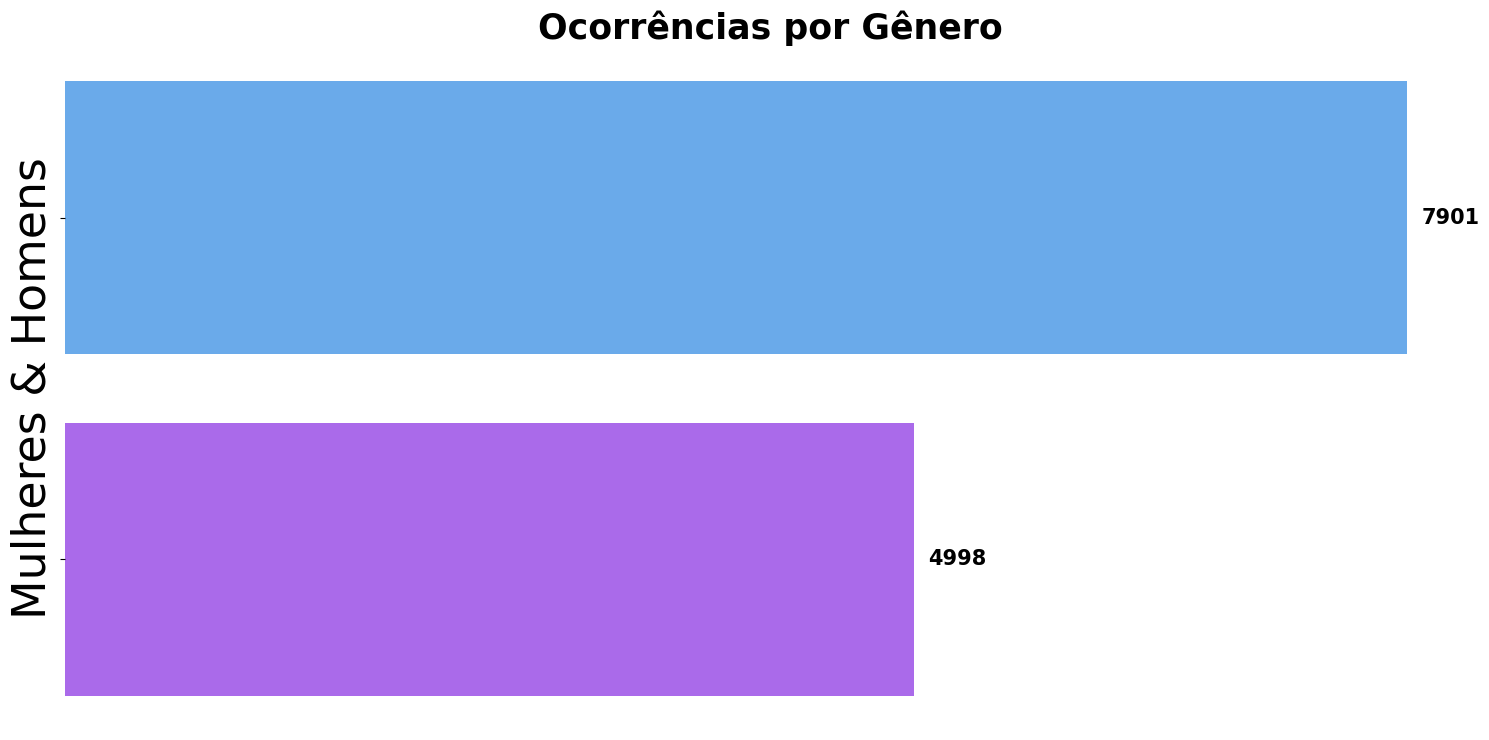

In [ ]:
# Crimes Report by Gender:
fig, ax = plt.subplots(figsize=[15,7.5])
sns.countplot(y='sexo', data=df1, ax=ax, palette='cool', saturation=.75,
              order=df1.sexo.value_counts(ascending=False).index)
ax.set_title('Ocorrências por Gênero', fontsize=25, fontweight='bold')
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(True)
plt.gca().axes.get_xaxis().set_visible(False)
plt.tick_params(axis=      'both',
                which=     'both',
                labelleft  =False)
values= df1.sexo.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],  labels=values,
              fontsize=15,  padding=10 ,     fontweight='bold')
ax.set(ylabel='ylabels')
plt.ylabel('Mulheres & Homens', fontsize=33, fontweight='regular')
plt.tight_layout()
plt.show()

### Boletins de Ocorrência

Instrumento vital para o planejamento estratégico da polícia, o Boletim de Ocorrência deveria ser registrado sempre que ocorre crime ou tentativa de crime. Será essa a realidade em São Paulo**?**

Observa**-**se que a maioria das pessoas registra boletins de ocorrência; entretanto, o número e a proporção em relação ao total da base de dados de pessoas que não registram boletim de ocorrência ainda é mais alto que o ideal.

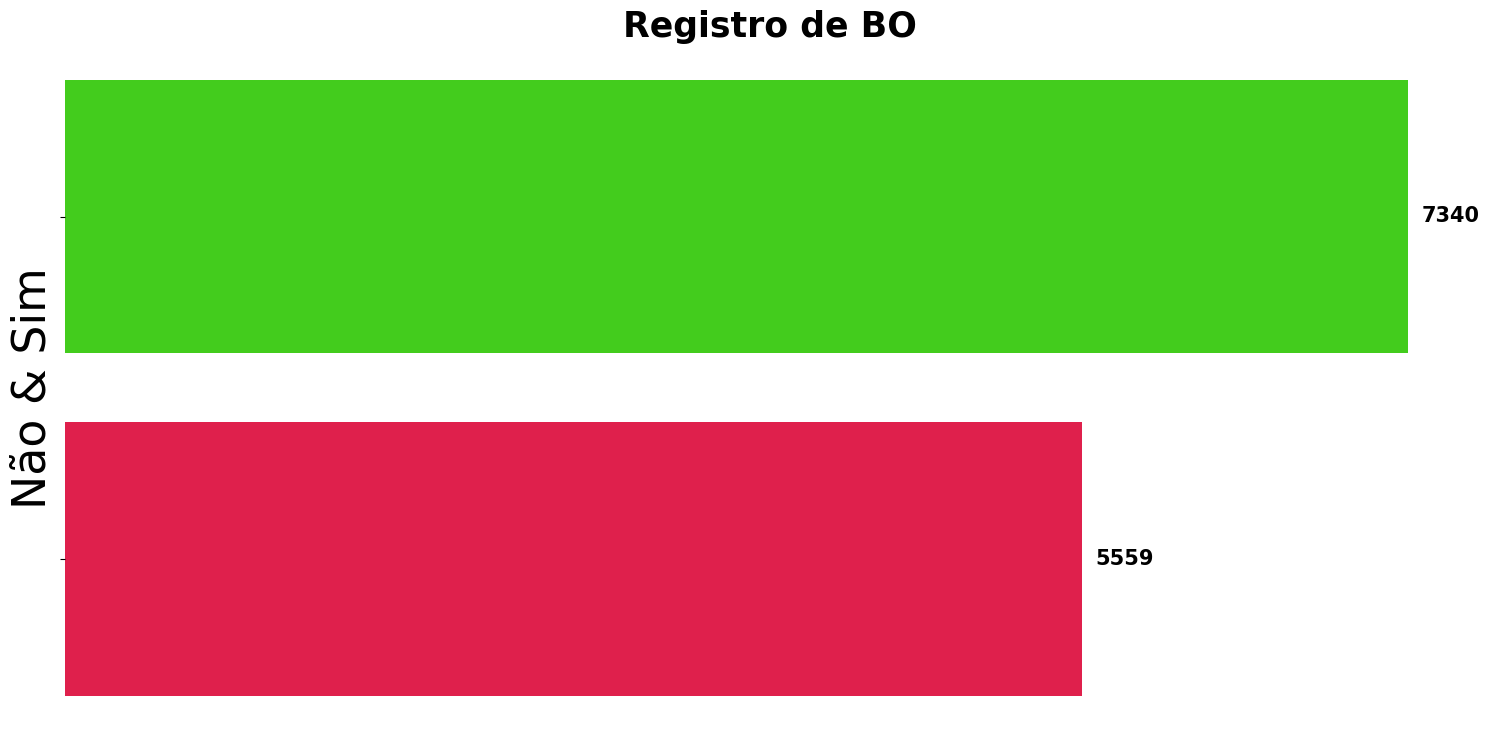

In [ ]:
# BO Report:
fig, ax = plt.subplots(figsize=[15,7.5])
sns.countplot(y='BO', data=df1, ax=ax, palette='prism', saturation=.75,
              order=df1.BO.value_counts(ascending=False).index)
ax.set_title('Registro de BO', fontsize=25, fontweight='bold')
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(True)
plt.gca().axes.get_xaxis().set_visible(False)
plt.tick_params(axis=      'both',
                which=     'both',
                labelleft  =False)
values= df1.BO.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],  labels=values,
              fontsize=15,  padding=10 ,     fontweight='bold')
ax.set(ylabel='ylabels')
plt.ylabel('Não & Sim', fontsize=33, fontweight='regular')
plt.tight_layout()
plt.show()

### Criminalidade por Bairro

De acordo com os dados, quais seriam os bairros com maior ocorrência de crimes**?**

Observou**-**se que há valores em japonês nos dados dos bairros, gerando erro. Infere**-**se, à princípio, que o dispositivo, provavelmente móvel, utilizado para o preenchimento dos dados estava configurado para o idioma japonês. Esses valores serão substituídos.

Verifica**-**se que as regiões com maior registro de crimes são**:**

* São Paulo (área central);
* Consolação;
* Vila Mariana;
* Bela Vista.

Não obstante, essa informação deve ser vista considerando que o conjunto de dados é constituído por informações inseridas voluntariamente via internet, bem como requer que se tenha conhecimento da existência da plataforma que coletou os dados. Logo, é apenas informação sobre o universo destes dados e não refletindo, necessariamente os bairros com os reais maiores índices de criminalidade.

In [ ]:
df1.bairro.value_counts().sort_values(ascending=False).iloc[0:10]

N/A             1703
São Paulo        630
Consolação       345
Vila Mariana     339
Bela Vista       323
Pinheiros        240
Ipiranga         210
Butantã          173
Liberdade        164
República        156
Name: bairro, dtype: int64

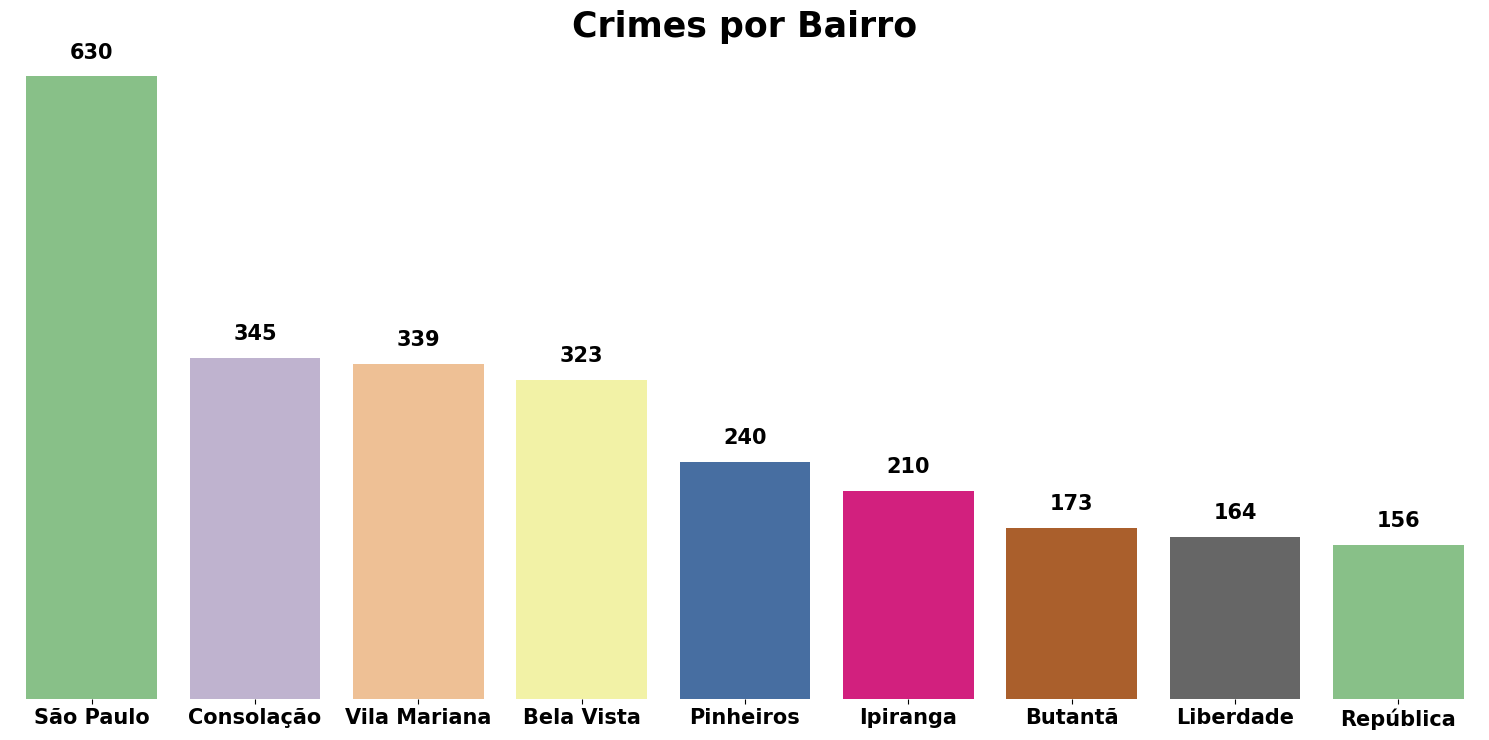

In [ ]:
# Crimes by NeighborHood:
fig, ax = plt.subplots(figsize=[15,7.5])
sns.countplot(x='bairro', data=df1, ax=ax, palette='Accent', saturation=.75,
         order=df1.bairro.value_counts(ascending=False).iloc[1:10].index)
ax.set_title('Crimes por Bairro', fontsize=25, fontweight='bold')
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(15)
values= df1.bairro.value_counts(ascending=False).iloc[1:10].values
ax.bar_label(container=ax.containers[0], labels=values,
              fontsize=15,  padding=10 , fontweight='bold')
ax.set(xlabel=None)
plt.tight_layout()
plt.savefig('NeighborHoodSP.png')
plt.show()

### Tendência da Criminalidade

Com o advento da InterNet e ampliação dos meios de divulgação de informação, há maior acesso a dados e seus históricos. Mas será que maior acesso a informações significa aumento de casos**?**

Ao mesmo tempo, tecnologias **&** estratégias de segurança também foram atualizadas. Qual será o resultado dessa equação**?**

O HistoGrama mostra algumas informações interessantes**:**

* Pico de Criminalidade em 2014;
* Diminuição na Criminalidade em 2015;
* Aumento na Criminalidade entre 2015 e 2017.

Há de se considerar não ser possível garantir que os dados foram adquiridos com precisão ao longo desses anos. Diferenças muito grandes levantam sinais de alerta.

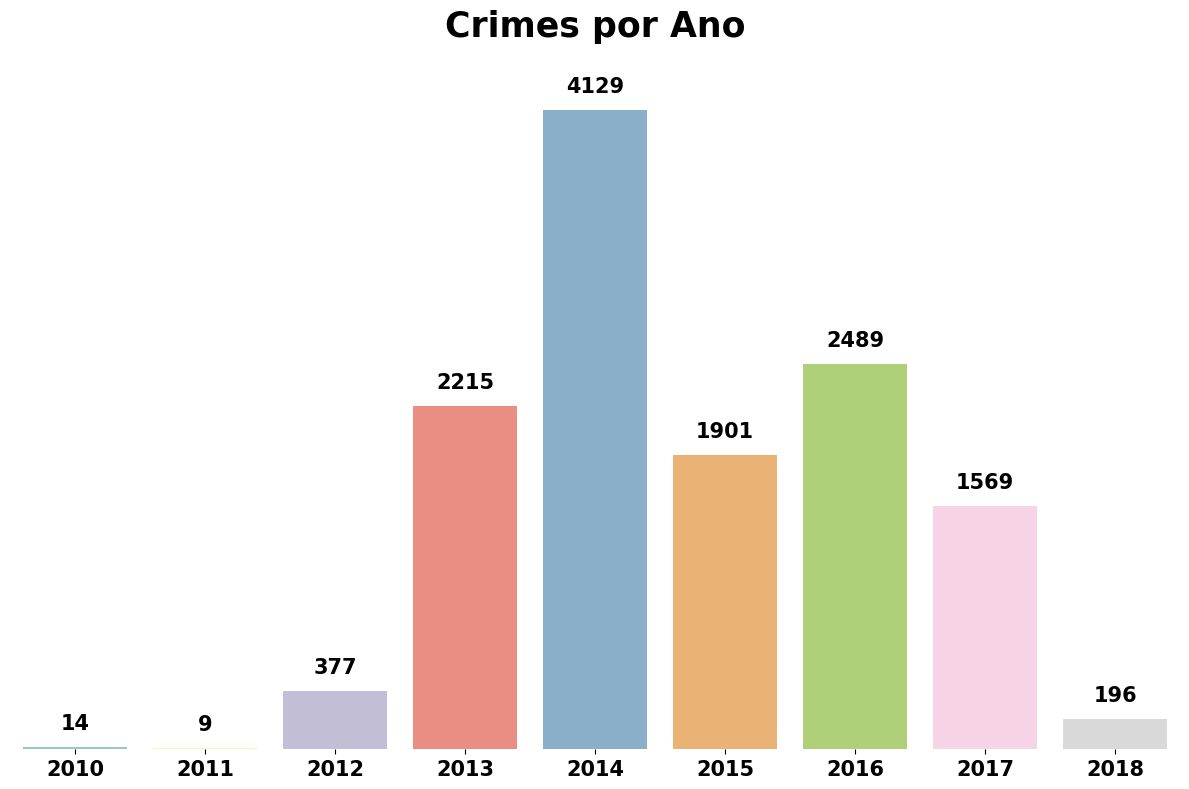

In [ ]:
# Crimes Trend:
fig, ax = plt.subplots(figsize=[12,8])
sns.countplot(x=df1.index.year, data=df1, ax=ax, palette='Set3', saturation=.75)
ax.set_title('Crimes por Ano' , fontsize=25,  fontweight='bold', y=1.05)
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(15)
values= df1.index.year.value_counts(sort=False).values
ax.bar_label(container=ax.containers[0], labels=values,
              fontsize=15,  padding=10 , fontweight='bold')
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

Lembrando que a origem dos dados é por preenchimento voluntário, logo os gráficos refletem apenas o universo dos dados e não necessariamente a realidade. As pessoas podem ter se empolgado com a novidade, mas depois deixaram de usar a plataforma, por exemplo.

Limpeza final do _DataSet_, eliminando alguns _OutLiers_ fora de escopo geográfico**:**

In [ ]:
# Removing OutLiers from Latitude & Longitude:
df1[['latitude', 'longitude']].describe()

,latitude,longitude
count,12899.000000,12899.000000
mean,-23.566805,-46.636817
std,0.366295,0.439810
min,-26.473037,-52.173376
25%,-23.607056,-46.696776
50%,-23.567079,-46.648535
75%,-23.541510,-46.606492
max,-0.013911,0.004533


Verificando melhor abordagem de forma a preservar a maior base de dados possível**:**

In [ ]:
df1[['latitude', 'longitude']].quantile(.875)

latitude    -23.512776
longitude   -46.534539
Name: 0.875, dtype: float64

In [ ]:
df1[['latitude', 'longitude']].quantile(.88)

latitude    -23.510593
longitude   -46.528398
Name: 0.88, dtype: float64

In [ ]:
df1[['latitude', 'longitude']].quantile(.888)

latitude    -23.508030
longitude   -46.521322
Name: 0.888, dtype: float64

In [ ]:
df1[['latitude', 'longitude']].quantile(.90)

latitude    -23.504139
longitude   -46.509896
Name: 0.9, dtype: float64

In [ ]:
df1[['latitude', 'longitude']].quantile(.95)

latitude    -23.484843
longitude   -46.462577
Name: 0.95, dtype: float64

In [ ]:
df1.shape

(12899, 32)

In [ ]:
# Removing OutLiers:
excluir_latitude  = df1[(df1.latitude  < -27)|(df1.latitude  > -23)].index
df2 = df1.drop(index=excluir_latitude)
excluir_longitude = df1[(df1.longitude < -53)|(df1.longitude > -46)].index
df2 = df1.drop(index=excluir_longitude)
df2.shape

(12872, 32)

In [ ]:
df2[['latitude', 'longitude']].describe()

,latitude,longitude
count,12872.000000,12872.000000
mean,-23.571364,-46.643747
std,0.232248,0.114986
min,-26.473037,-52.173376
25%,-23.607092,-46.696943
50%,-23.567138,-46.648685
75%,-23.541621,-46.607018
max,-1.351402,-46.075681


In [ ]:
df2.loc[df2['latitude']>-23]

,id,bairro,created,descricao,endereco,latitude,longitude,BO,sexo,AssaltoID,titulo,prejuizo,Bicicleta,BolsaMochila,Carteira,CartaoCredito,Celular,Computador,DVD,Dinheiro,Documentos,EquipamentoSom,Estepe,iPodMP4,Moveis,NoteBook,Outros,Relogio,Som,Tablet,TV,time
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-03-13 06:30:00,82758,Coqueiro,2017-07-10 15:00:33.537,Estava com 2 pessoas na parada quando vimos 2 ...,"Av. Principal, 546 - Coqueiro, Ananindeua - PA...",-1.351402,-48.386924,True,1,3,Fui assaltado indo para a escola,900.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2015-03-13 06:30:00
2015-10-24 02:00:00,55326,N/A,2015-10-28 14:37:10.808,Furtaram um voyagen placa.bop9006 em frente a ...,"Estr. Lep Cento e Dezoito, Lençóis Paulista - ...",-22.581982,-48.715155,True,1,1,Furto,8.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2015-10-24 02:00:00
2015-11-09 06:00:00,63789,N/A,2016-05-08 01:48:11.319,Mão armada. Roubaram depois uma Academia.\r\n,"R. Pres. Bernardes, 529 - Jardim Flamboyant, C...",-22.882795,-47.032297,True,1,9,Saindo da residência,8.0,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,2015-11-09 06:00:00
2016-03-01 19:45:00,60558,N/A,2016-03-02 00:55:21.787,3 Pessoas entraram em uma casa e amarraram a g...,"Rua Dr. Ruy Vicente de Mello, 687 - Cidade Uni...",-22.822318,-47.074435,True,1,3,Fui assaltado a mão armada,0.0,False,True,True,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,2016-03-01 19:45:00
2016-05-14 09:00:00,76108,Brasília,2016-12-28 20:19:35.750,Carro estacionado em estacionamento público . ...,"BL B - Brasília, DF, Brasil",-15.737159,-47.886533,False,1,1,Arrombamento de veículo,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2016-05-14 09:00:00
2016-08-22 21:00:00,68242,Jardim Teixeira,2016-08-23 22:48:42.760,Fui sequestrado por dois homens armados com pi...,"Av. Marginal Direita, 4008-4508 - Jardim Teixe...",-20.703930,-47.891773,True,1,4,Sequestro no estacionamento,0.0,False,True,True,True,True,False,False,True,True,False,False,False,False,False,True,True,False,False,False,2016-08-22 21:00:00
2016-10-11 17:00:00,73352,Santa Terezinha,2016-11-08 03:05:03.121,Caminhão Bi-Trem carregada com 44.000 litros d...,"Rua Professor Zeferino Vaz, 627 - Santa Terezi...",-22.777519,-47.138186,True,1,9,Roubo de caminhão combustível com Diesel,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2016-10-11 17:00:00
2016-10-18 18:15:00,71593,Teodoro Sampaio,2016-10-26 15:21:17.351,Estava sozinha na esquina com dr Arnaldo. Ban...,"Rod. Arlíndo Bétio, 1582-1590, Teodoro Sampaio...",-22.531427,-52.173376,False,0,2,Assaltada à mão armada,40.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2016-10-18 18:15:00
2016-10-19 16:30:00,78541,Jardim Santa Rosa,2017-03-07 00:01:48.517,"Um Santana 94/95, bege de Matão, placa BSC 230...","R. Octagino Silveira Leite, 106-130 - Jardim S...",-21.600991,-48.383546,False,1,9,"Roubo de um Santana, 4 portas ano 94/95 bege, ...",0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2016-10-19 16:30:00


In [ ]:
# Verifying Shape:
df2  = df2.drop(df2.loc[df2['latitude']>-23].index)
df2.shape

(12855, 32)

In [ ]:
# Verifying Final Results:
df2[['latitude', 'longitude']].describe()

,latitude,longitude
count,12855.000000,12855.000000
mean,-23.575323,-46.641968
std,0.067575,0.091150
min,-26.473037,-49.126238
25%,-23.607185,-46.696705
50%,-23.567241,-46.648571
75%,-23.541700,-46.606991
max,-23.036739,-46.075681


In [ ]:
# Exporting Cleaned DataSet:
df2.to_csv('CriminalidadeSP2.csv')

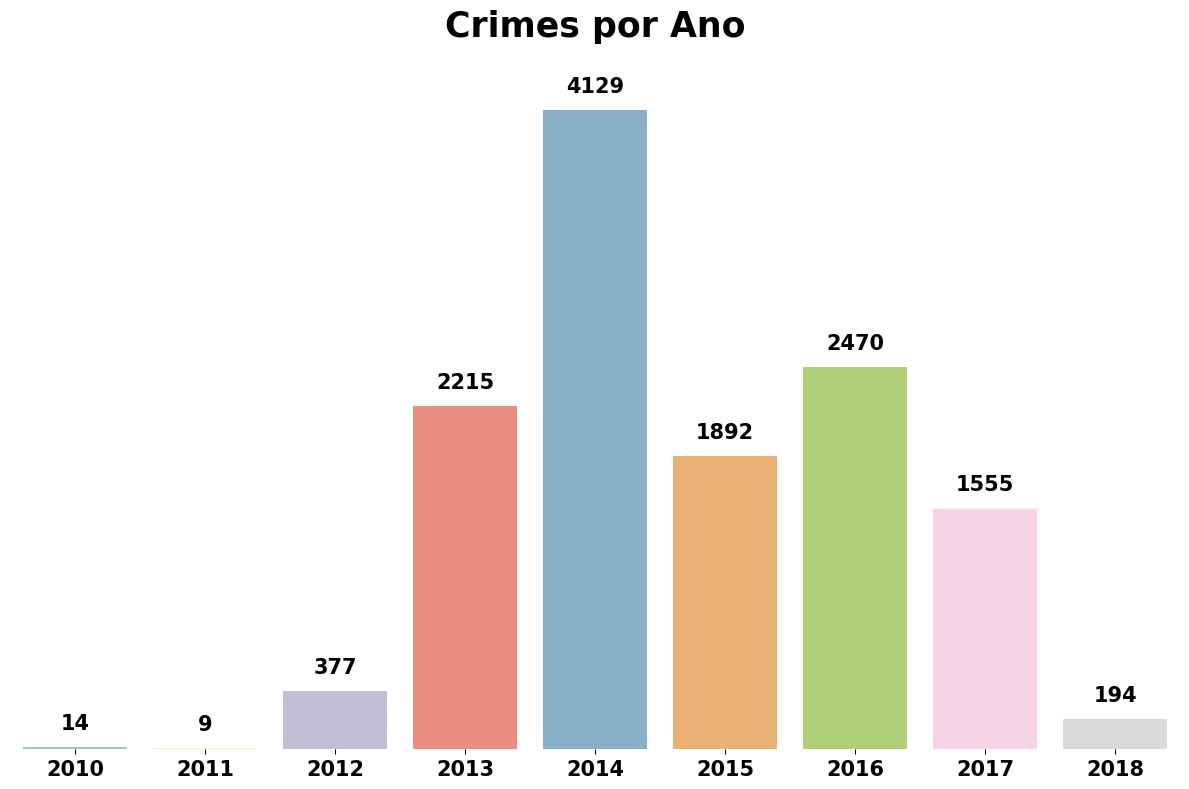

In [ ]:
# Checking Crimes Trend after Cleaning:
fig, ax = plt.subplots(figsize=[12,8])
sns.countplot(x=df2.index.year, data=df2, ax=ax, palette='Set3', saturation=.75)
ax.set_title('Crimes por Ano' , fontsize=25,  fontweight='bold', y=1.05)
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(15)
values= df2.index.year.value_counts(sort=False).values
ax.bar_label(container=ax.containers[0], labels=values,
              fontsize=15,  padding=10 , fontweight='bold')
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

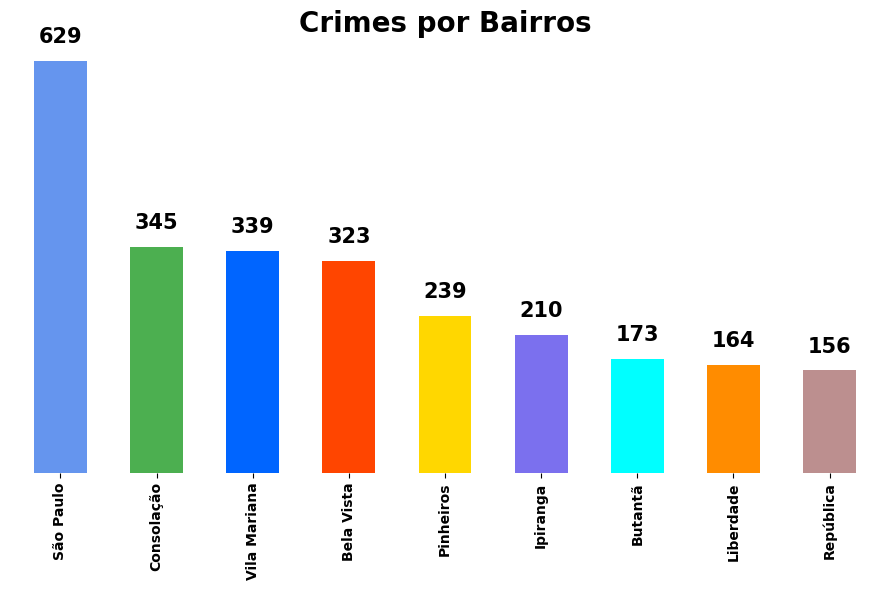

In [ ]:
# SeaBorn Palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
# MatPlotLip:
fig, ax = plt.subplots(figsize=[9,6])
df2.bairro.value_counts().sort_values(ascending=False).iloc[1:10].plot(kind='bar',
    color=['#6595EE','#4CAF50','#0065FF','#FF4500','#FFD700','#7B70EE','#00FFFF','#FF8C00','rosybrown'],
    width=0.55)
ax.set_title('Crimes por Bairros', fontsize=20, fontweight='bold')
ax.spines['left'].set_visible(  False)
ax.spines['right'].set_visible( False)
ax.spines['top'].set_visible(   False)
ax.spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(True)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(10)
values= df2.bairro.value_counts(ascending=False).iloc[1:10].values
ax.bar_label(container=ax.containers[0], labels=values,
              fontsize=15,  padding=10 , fontweight='bold')
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

## WordCloud

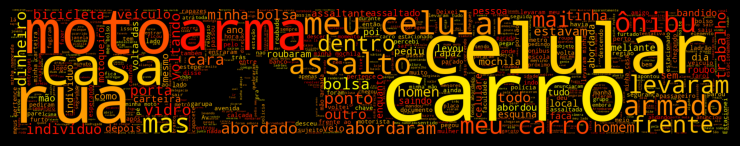

In [ ]:
# WordCloud:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from    PIL    import Image
SP          =  pd.read_csv('/content/CriminalidadeSP2.csv')
select      =['descricao']
text        =  SP[list(select)]
text        =  text.dropna(subset=['descricao'], axis=0)['descricao']
all         = ' '.join(words for words in text)
StopWords   =  set(STOPWORDS)
StopWords.update(['b', 'PID', 'will', 'number', 'br', 'EXT',
                  'na', 'o', 'e', 'em', 'uma', 'da', 'que', 'eu', 'de', 'para',
                  'ele', 'por', 'um', 'estava', 'fui', 'foi', 'já', 'ma', 'não',
                  'era', 'dois', 'dele', 'nos', '.', 'eles', 'ela', 'se', 'é',
                  'deles', 'só', 'deles', 'dos', 'até', 'mim', 'os', 'quando'])
mask        = np.array(Image.open('/content/SaoPauloSkyLine.png'))
WordCloud   = WordCloud(stopwords=StopWords,
                        mask=mask,
                        colormap='autumn',
                        background_color='black',
                        scale=1,
                        relative_scaling='auto',
                        min_font_size=5,
                        max_font_size=None,
                        max_words=750,
                        contour_width=1,
                        contour_color='black',
                        width=750, height=750, margin=0).generate(all)
fig, ax = plt.subplots(figsize=(7.5,7.5), facecolor='k')
ax.imshow(WordCloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(WordCloud)
WordCloud.to_file('CriminalidadeSP.png');

In [ ]:
# # Replacing values in Japanese:
# df.bairro = df.bairro.replace(['ヴィーラ・モルンビ',
#                                'ヴィーラ・モレイラ',
#                                'ヴィーラ・レイス',
#                                'ヴィーラ・マリア・トリンダーデ',
#                                'ヴィーラ・マリア・ルイーザ',
#                                'ヴィーラ・モヌメント',
#                                'ヴィーラ・パルケ・ジャバクアラ',
#                                'ヴィーラ・ブラジランジア',
#                                'ヴィーラ・マラカナン',
#                                'ヴィーラ・ジウダ',
#                                'ヴィーラ・ダス・メルセッス',
#                                'ヴィーラ・ダヌービオ・アズー',
#                                'ヴィーラ・サン・ルイース (ゾーナ・オエステ)',
#                                'ヴィーラ・シケイラ (ゾーナ・ノルテ)',
#                                'ヴィーラ・シケイラ (ゾーナ・レステ)',
#                                'ヴィーラ・クーニャ・ブエノ',
#                                'ヴィーラ・グァラニー (ゾーナ・スー)',
#                                'ヴィーラ・コンスタンサ',
#                                'ヴィーラ・エリオーポリス',
#                                'ヴィーラ・エレナ',
#                                'ヴィーラ・オリンダ',
#                                'ラジェアド',
#                                'ヴィーラ・アベセ',
#                                'ヴィーラ・アーグァ・フンダ',
#                                'パルケ・ラーモス・フレイタス',
#                                'ピリトゥバ',
#                                'ポンテ・ペケナ',
#                                'バーホ・ブランコ (ゾーナ・ノルテ)',
#                                'パルケ・チエテ',
#                                'パルケ・パイネイラス',
#                                'セルケイラ・セーザル',
#                                'ノーヴァ・ピラジュ',
#                                'バロネーザ',
#                                'ジャルジン・レオノル',
#                                'ジャルジン・ヴァンダ',
#                                'ジャルジン・ヴァーレ・ダス・ヴィルトゥーデス',
#                                'ジャルジン・プライーニャ',
#                                'ジャルジン・マルセウ',
#                                'ジャルジン・モルンビ',
#                                'ジャルジン・フェリシダーデ (ゾーナ・オエステ)',
#                                'ジャルジン・ブラジリア (ゾーナ・ノルテ)',
#                                'ジャルジン・ブラジル (ゾーナ・ノルテ)',
#                                'ジャルジン・ダ・ペドレイラ',
#                                'ジャルジン・ドン・ボスコ',
#                                'ジャルジン・パウリスタノ',
#                                'ジャルジン・サン・ルイス',
#                                'ジャルジン・ジャバクアラ',
#                                'ジャルジン・ダス・ローザス (ゾーナ・レステ I)',
#                                'ジャルジン・サン・ジョゼー',
#                                'ジャルジン・サン・ジョゼー (ゾーナ・ノルテ)',
#                                'ジャルジン・サン・ニコラウ',
#                                'ジャルジン・サビアー II',
#                                'ジャルジン・サンタ・テレジーニャ (ペドレイラ)',
#                                'ジャルジン・サンタ・マリア',
#                                'ジャルジン・カペラ',
#                                'ジャルジン・グローリア',
#                                'ジャルジン・サテーリテ',
#                                'ジャルジン・インペリアウ',
#                                'ジャルジン・エリーザ',
#                                'ジャルジン・オデーテ',
#                                'ジャルジン・アンジェラ',
#                                'ジャルジン・イラセーマ',
#                                'ジャルジン・インテルナシオナウ',
#                                'ジャサナン',
#                                'ジャルジン・アウト・アレーグレ (ゾーナ・レステ)',
#                                'ジャルジン・アナーリア・フランコ',
#                                'サン・ドミンゴス',
#                                'サン・ルカス',
#                                'シャーカラ・タトゥアペー',
#                                'コンジュント・アビタシオナウ・パードレ・ジョゼー・デ・アンシエタ',
#                                'コンジュント・アビタシオナウ・パードレ・マノエウ・ダ・ノーブレガ',
#                                'コンジュント・アビタシオナウ・ブリガデイロ・ファリア・リマ',
#                                'ガメレイラ・ブランカ',
#                                'クルシーノ',
#                                'コンジュント・アビタシオナウ・インスチトゥト・アジヴェンチスタ',
#                                'エルメリノ・マタラーゾ',
#                                'カハン',
#                                'カンポ・グランデ'],
#                                'JP')